In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import sys
sys.path.append("..")
from experiment.utils_experiment import * 

In [2]:
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

matplotlib.rc('font', **font)

In [3]:
# Define a color palette
color_optimal = "#DD5746" 
color_ddpg ="#4793AF"
color_ddpg_wo_aq='green'

In [7]:
file_path = "/Users/melodiemonod/projects/2024/deep_rl_liquidation/"

# with auxiliary q-function
job_name = "experiment_1-exponential_decay_kernel"
output_path = file_path + job_name + "/"

# without auxiliary q-function
job_name = "experiment_1-exponential_decay_kernel_without_auxiliary_q_function"
output_path_wo_aq = file_path + job_name + "/"

In [8]:
# Load outputs
env = load_object(output_path, "environment")
cache_size = load_object(output_path, "cache_size")
optimal_total_reward = load_object(output_path, "optimal_total_reward")

# with aq
episodes = load_object(output_path, "episodes")
best_total_reward = load_object(output_path, "best_total_reward")

# without aq
episodes_aq = load_object(output_path_wo_aq, "episodes")
best_total_reward_wo_aq = load_object(output_path_wo_aq, "best_total_reward")

In [9]:
# Transform outputs to pandas dataframe
pd_total_rewards = pd.DataFrame([x.numpy() for x in best_total_reward],columns=['total_rewards'])
pd_total_rewards_wo_aq = pd.DataFrame([x.numpy() for x in best_total_reward_wo_aq],columns=['total_rewards'])

In [10]:
plot_episode_0 = 100
plot_episode_1 = 2000
plot_episode_2 = max(episodes)

plt_episode_idx0 = episodes.index(min(episodes, key=lambda x: abs(x - plot_episode_0)))
plt_episode_idx1 = episodes.index(min(episodes, key=lambda x: abs(x - plot_episode_1)))
plt_episode_idx2 = episodes.index(min(episodes, key=lambda x: abs(x - plot_episode_2)))

/var/folders/f_/vxkztmj55t58xvh49q60z48w0000gn/T/ipykernel_69464/2701941975.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 1, figsize=(5,4))


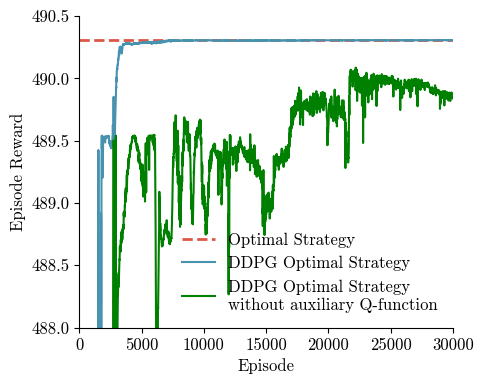

In [17]:
#  labels
label_ddpg='DDPG Optimal Strategy'
label_ddpg_wo_aq='DDPG Optimal Strategy\nwithout auxiliary Q-function'
label_optimal='Optimal Strategy'

# Create the main figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(5,4))

plt.axhline(
        y=optimal_total_reward, color = color_optimal, linestyle="--", label=label_optimal, linewidth = 2, 
    )
axs.plot(episodes, pd_total_rewards['total_rewards'], linewidth = 1.5, linestyle="-", color = color_ddpg, label=label_ddpg)
axs.plot(episodes_aq, pd_total_rewards_wo_aq['total_rewards'], linewidth = 1.5,  linestyle="-",color = color_ddpg_wo_aq, label=label_ddpg_wo_aq)
axs.set_xlabel('Episode', fontsize=12)
axs.set_ylabel('Episode Reward', fontsize=12)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
#axs.axvspan(0, warmup, color='black', alpha=0.1)
axs.set_xlim([0,max(episodes)])
axs.set_ylim([488, 490.5])
#axs.set_xscale('log')
axs.legend(fancybox=False, shadow=False, frameon = False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.3) 
fig.savefig(output_path + "auxiliary_q_function.pdf",dpi=175)